In [10]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
from dash import Dash, html, dash_table
from jupyter_dash import JupyterDash
import pandas as pd

In [ ]:
df = pd.read_csv('C:\\Users\\jihun\\Downloads\\stats (7).csv')

In [4]:
# Import packages
from dash import Dash, html, dash_table
from jupyter_dash import JupyterDash
import pandas as pd

# Incorporate data
df = pd.read_csv('C:\\Users\\jihun\\Downloads\\stats (7).csv')
available_indicators = df['Indicator Name'].unique()

# Initialize the app
app = JupyterDash(__name__)

# App layout
app.layout = html.Div([
    html.Div(children='My First App with Data'),
    dash_table.DataTable(data=df.to_dict('records'), page_size=10)
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

Dash app running on http://127.0.0.1:8050/


In [39]:
df = pd.read_csv('C:\\Users\\jihun\\Downloads\\stats (7).csv')

In [24]:
df.columns

Index(['last_name', ' first_name', 'player_id', 'year', 'p_k_percent',
       'p_bb_percent', 'xwoba', 'z_swing_percent', 'z_swing_miss_percent',
       'oz_swing_percent', 'oz_swing_miss_percent', 'oz_contact_percent',
       'out_zone_percent', 'iz_contact_percent', 'in_zone_percent',
       'edge_percent', 'whiff_percent', 'fastball_avg_speed',
       'fastball_avg_spin', 'fastball_avg_break', 'breaking_avg_speed',
       'breaking_avg_spin', 'breaking_avg_break', 'offspeed_avg_speed',
       'offspeed_avg_spin', 'offspeed_avg_break', 'Unnamed: 26'],
      dtype='object')

In [40]:
numerical_col = ['p_k_percent',
       'p_bb_percent', 'xwoba', 'z_swing_percent', 'z_swing_miss_percent',
       'oz_swing_percent', 'oz_swing_miss_percent', 'oz_contact_percent',
       'out_zone_percent', 'iz_contact_percent', 'in_zone_percent',
       'edge_percent', 'whiff_percent', 'fastball_avg_speed',
       'fastball_avg_spin', 'fastball_avg_break', 'breaking_avg_speed',
       'breaking_avg_spin', 'breaking_avg_break', 'offspeed_avg_speed',
       'offspeed_avg_spin', 'offspeed_avg_break']

In [42]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
# app = JupyterDash(__name__,external_stylesheets=external_stylesheets)
app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='xaxis-column',
                options=numerical_col,
                value=numerical_col[0],
                placeholder="Select X-axis column"
            ),
            dcc.RadioItems(
                id='xaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],
        style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='yaxis-column',
                options=numerical_col,
                value=numerical_col[1]
            ),
            dcc.RadioItems(
                id='yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
    ]),

    dcc.Graph(id='indicator-graphic'),

    dcc.Slider(
        id='year--slider',
        min=df['year'].min(),
        max=df['year'].max(),
        value=df['year'].max(),
        marks={str(year): str(year) for year in df['year'].unique()}
    )
])

# Callbacks
@app.callback(
    dash.dependencies.Output('indicator-graphic', 'figure'),
    [dash.dependencies.Input('xaxis-column', 'value'),
     dash.dependencies.Input('yaxis-column', 'value'),
     dash.dependencies.Input('xaxis-type', 'value'),
     dash.dependencies.Input('yaxis-type', 'value'),
     dash.dependencies.Input('year--slider', 'value')])
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['year'] == year_value]
    return {
        'data': [go.Scatter(
            x=dff[xaxis_column_name],
            y=dff[yaxis_column_name],
            text=dff['last_name'],
            mode='markers',
            marker={
                'size': 10,
                'opacity': 1,
                'color': 'blue',
                'line': {'width': 2}
            }
        )],
        'layout': go.Layout(
            xaxis={
                'title': xaxis_column_name,
                'type': 'linear' if xaxis_type == 'Linear' else 'log'
            },
            yaxis={
                'title': yaxis_column_name,
                'type': 'linear' if yaxis_type == 'Linear' else 'log'
            },
            margin={'l': 40, 'b': 40, 't': 10, 'r': 0},
            hovermode='closest',
        )
    }

# viewer.show(app)
if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

Dash app running on http://127.0.0.1:8050/


In [29]:
df = pd.read_csv('C:\\Users\\jihun\\Downloads\\stats (7).csv')

In [43]:
from dash import Dash, html, dcc
import dash_bootstrap_components as dbc
from dash_bootstrap_templates import load_figure_template
import plotly.express as px
import dash
import pandas as pd
import plotly.graph_objs as go
from jupyter_dash import JupyterDash

df = px.data.gapminder()

templates = [
    "bootstrap",
    "minty",
    "pulse",
    "flatly",
    "quartz",
    "cyborg",
    "darkly",
    "vapor",
]

load_figure_template(templates)

figures = [
    px.scatter(
        df.query("year==2007"),
        x="gdpPercap",
        y="lifeExp",
        size="pop",
        color="continent",
        log_x=True,
        size_max=60,
        template=template,
        title="Gapminder 2007: '%s' theme" % template,
    )
    for template in templates
]

dbc_css = ("https://cdn.jsdelivr.net/gh/AnnMarieW/dash-bootstrap-templates@V1.0.2/dbc.min.css")
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP, dbc_css])

app.layout = dbc.Container([dcc.Graph(figure=fig, className="m-4") for fig in figures])

if __name__ == "__main__":
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

Dash app running on http://127.0.0.1:8050/


In [4]:
df.head(5)

,last_name,first_name,player_id,year,p_k_percent,p_bb_percent,xwoba,z_swing_percent,z_swing_miss_percent,oz_swing_percent,...,fastball_avg_speed,fastball_avg_spin,fastball_avg_break,breaking_avg_speed,breaking_avg_spin,breaking_avg_break,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break,Unnamed: 26
0,Perez,Oliver,424144,2020,19.4,8.3,0.274,62.3,10.6,23.8,...,89.9,2114,19.4,76.1,2195.0,10.3,NaN,NaN,NaN,NaN
1,Wainwright,Adam,425794,2020,20.6,5.7,0.324,62.9,15.2,30.2,...,87.6,2253,13.5,73.5,2791.0,22.0,81.8,1683.0,15.3,NaN
2,Greinke,Zack,425844,2020,24.5,3.3,0.299,59.7,17.0,26.3,...,88.1,2327,17.6,77.7,2425.0,12.2,86.2,1668.0,14.0,NaN
3,Petit,Yusmeiro,433589,2020,19.3,5.7,0.328,73.2,22.6,31.6,...,86.7,2134,17.4,74.3,2000.0,13.3,81.3,1753.0,18.3,NaN
4,Sanchez,Anibal,434671,2020,17.6,7.3,0.355,70.3,16.8,28.7,...,88.6,2152,16.2,76.8,2044.0,4.9,79.6,1492.0,15.0,NaN


In [53]:
dff=df.groupby('year')['p_k_percent','p_bb_percent','whiff_percent','fastball_avg_speed','fastball_avg_spin','breaking_avg_spin','xwoba'].agg('mean')

C:\Users\jihun\AppData\Local\Temp\ipykernel_10676\3906231937.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [18]:
dff=dff.reset_index()

In [20]:
dff

,year,p_k_percent,p_bb_percent,whiff_percent,fastball_avg_speed,fastball_avg_spin,breaking_avg_spin,xwoba
0,2016,21.104407,8.834068,23.638644,92.552712,2226.123729,2332.695205,0.317558
1,2017,21.508725,8.960906,24.278356,92.462919,2222.664430,2384.263959,0.320285
2,2018,21.944715,8.994959,24.811057,92.502114,2236.099187,2409.950900,0.317301
3,2019,22.664501,9.331854,25.553566,92.795563,2258.148970,2448.880383,0.325685
4,2020,23.946482,9.359488,26.830277,92.648614,2268.746269,2448.149675,0.318959
5,2021,22.810152,9.491970,25.650000,93.026212,2239.936364,2413.809451,0.320906
6,2022,22.303297,8.863893,25.618995,93.383046,2244.770801,2427.988924,0.311432


In [25]:
fig = px.parallel_coordinates(dff, color='year', 
                              dimensions=["p_k_percent","p_bb_percent","fastball_avg_speed","fastball_avg_spin", "breaking_avg_spin"],
                              color_continuous_scale=px.colors.diverging.Tealrose,range_color=[2016,2022],
                              color_continuous_midpoint=2)
fig.show()

In [28]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [31]:
df['whiff_percent'].describe()

count    4198.000000
mean       25.162339
std         5.493908
min         9.600000
25%        21.400000
50%        24.800000
75%        28.500000
max        51.800000
Name: whiff_percent, dtype: float64

In [34]:
df.sort_values('year')

,last_name,first_name,player_id,year,p_k_percent,p_bb_percent,xwoba,z_swing_percent,z_swing_miss_percent,oz_swing_percent,...,fastball_avg_speed,fastball_avg_spin,fastball_avg_break,breaking_avg_speed,breaking_avg_spin,breaking_avg_break,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break,Unnamed: 26
1021,McCullers Jr.,Lance,621121,2016,30.1,12.8,0.289,59.5,16.1,30.1,...,94.4,2343,12.6,85.7,2899.0,18.3,89.3,1798.0,11.9,NaN
698,Delgado,Randall,517414,2016,20.2,10.7,0.292,63.5,14.1,30.0,...,92.9,2205,19.0,82.5,1975.0,5.8,85.8,1973.0,17.2,NaN
699,Boscan,Wilfredo,517448,2016,11.9,10.4,0.333,66.0,10.0,40.1,...,91.2,2237,18.1,76.2,2441.0,16.0,82.5,1843.0,15.2,NaN
700,Salazar,Danny,517593,2016,27.6,10.8,0.307,67.0,19.3,27.6,...,95.3,2410,20.1,84.1,2414.0,9.6,86.4,1407.0,9.8,NaN
701,Alexander,Scott,518397,2016,19.0,8.3,0.291,65.2,17.8,34.3,...,91.2,2104,15.3,83.2,2062.0,4.2,83.6,1614.0,16.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707,Seabold,Connor,657756,2022,19.4,8.2,0.360,71.1,17.8,26.7,...,92.1,2113,19.7,84.5,2417.0,6.7,80.4,2009.0,15.9,NaN
2706,Ryan,Joe,657746,2022,25.0,7.8,0.294,71.6,20.0,28.0,...,92.0,2194,18.4,80.2,2211.0,7.8,84.6,2087.0,20.0,NaN
2705,Koenig,Jared,657649,2022,12.4,8.5,0.347,67.6,8.4,22.7,...,87.8,2138,13.9,77.6,2210.0,13.1,82.8,1605.0,15.2,NaN
2712,Lamet,Dinelson,659275,2022,30.2,12.8,0.328,67.8,32.3,21.7,...,95.4,2403,16.0,86.3,2410.0,6.3,NaN,NaN,NaN,NaN


In [143]:
from dash import Dash, dcc, html
import plotly.express as px
import dash_bootstrap_components as dbc
import pandas as pd
import plotly.graph_objs as go
from jupyter_dash import JupyterDash

from dash_bootstrap_templates import load_figure_template

# This loads the "cyborg" themed figure template from dash-bootstrap-templates library,
# adds it to plotly.io and makes it the default figure template.
load_figure_template("bootstrap")

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.FLATLY])

df = pd.read_csv('C:\\Users\\jihun\\Downloads\\stats (7).csv')


df=df.sort_values('year')
scatter_fastball = px.scatter(df, x="fastball_avg_spin", y="fastball_avg_speed", animation_frame="year",
           color="xwoba", hover_name="last_name",range_color=[0.2,0.5],
           #log_x=True, 
                 size_max=20, range_x=[1500,3000], range_y=[80,102])


scatter_breaking = px.scatter(df, x="breaking_avg_spin", y="breaking_avg_break", animation_frame="year",
           color="xwoba", hover_name="last_name",range_color=[0.2,0.5],
                 size_max=20, range_x=[1600,3200], range_y=[0,30])


scatter_offspeed = px.scatter(df, x="offspeed_avg_spin", y="offspeed_avg_break", animation_frame="year",
           color="xwoba", hover_name="last_name",range_color=[0.2,0.5],
                 size_max=20, range_x=[0,3000], range_y=[0,30])



dff=df.groupby('year')['p_k_percent','p_bb_percent','whiff_percent',
                       'fastball_avg_speed','offspeed_avg_break',
                       'breaking_avg_break','xwoba'].agg('mean').reset_index()

average_parallel = px.parallel_coordinates(dff, color='year', 
                              dimensions=["p_k_percent","p_bb_percent","fastball_avg_speed","breaking_avg_break", 
                                          "offspeed_avg_break","xwoba"],
                              color_continuous_scale=px.colors.diverging.Tealrose,range_color=[2016,2022],
                              color_continuous_midpoint=2)




graphs = html.Div(
    [
        dbc.Row(
            [
                dbc.Col(dcc.Graph(figure=average_parallel), lg=6),
                dbc.Col(dcc.Graph(figure=scatter_fastball), lg=6),
            ],
            className="mt-4",
        ),
        dbc.Row(
            [
                dbc.Col(dcc.Graph(figure=scatter_breaking), lg=6),
                dbc.Col(dcc.Graph(figure=scatter_offspeed), lg=6),
            ],
            className="mt-4",
        ),
    ]
)

heading = html.H1("Pitcher Stats By Year", className="bg-primary text-white p-2")

app.layout = dbc.Container([heading, graphs], fluid=True)


if __name__ == "__main__":
    app.run_server(debug=True)

C:\Users\jihun\AppData\Local\Temp\ipykernel_10676\3118231630.py:37: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Dash is running on http://127.0.0.1:8050/

Dash app running on http://127.0.0.1:8050/


In [133]:
from dash import Dash, dcc, html, Input, Output
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc
from dash_bootstrap_templates import ThemeChangerAIO, template_from_url


dbc_css = (
    "https://cdn.jsdelivr.net/gh/AnnMarieW/dash-bootstrap-templates@V1.0.1/dbc.min.css"
)
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP, dbc_css])




df = pd.DataFrame(
    {
        "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
        "Amount": [4, 1, 2, 2, 4, 5],
        "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"],
    }
)
header = html.H4(
    "ThemeChangerAIO Demo", className="bg-primary text-white p-4 mb-2 text-center"
)
buttons = html.Div(
    [
        dbc.Button("Primary", color="primary"),
        dbc.Button("Secondary", color="secondary"),
        dbc.Button("Success", color="success"),
        dbc.Button("Warning", color="warning"),
        dbc.Button("Danger", color="danger"),
        dbc.Button("Info", color="info"),
        dbc.Button("Light", color="light"),
        dbc.Button("Dark", color="dark"),
        dbc.Button("Link", color="link"),
    ],
    className="m-4",
)
graph = html.Div(dcc.Graph(id="graph"), className="m-4")

app.layout = dbc.Container(
    [
        header,
        dbc.Row(
            [
                dbc.Col(ThemeChangerAIO(aio_id="theme", radio_props={"value":dbc.themes.FLATLY}), width=2,),
                dbc.Col([buttons, graph],width=10),
            ]
        ),
    ],
    className="m-4 dbc",
    fluid=True,
)


@app.callback(
    Output("graph", "figure"), Input(ThemeChangerAIO.ids.radio("theme"), "value"),
)
def update_graph_theme(theme):
    return px.bar(
        df, x="Fruit", y="Amount", color="City", barmode="group", template=template_from_url(theme)
    )


if __name__ == "__main__":
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

Dash app running on http://127.0.0.1:8050/


In [39]:
df.describe()

,player_id,year,p_k_percent,p_bb_percent,xwoba,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,...,fastball_avg_speed,fastball_avg_spin,fastball_avg_break,breaking_avg_speed,breaking_avg_spin,breaking_avg_break,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break,Unnamed: 26
count,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,...,4198.000000,4198.000000,4198.000000,4163.000000,4162.000000,4163.000000,3631.000000,3631.000000,3631.000000,0.0
mean,576743.359219,2019.029300,22.287018,9.117127,0.318882,67.130348,17.732253,27.879014,41.585779,57.782873,...,92.780205,2241.670557,17.445545,82.156161,2408.906055,10.261590,85.321261,1733.408427,15.825255,NaN
std,73075.046297,2.021295,6.225344,3.295309,0.042521,4.352528,4.777835,4.115655,9.401976,9.355995,...,2.706958,157.973880,2.530657,3.718235,251.829316,4.340636,3.162735,277.685838,2.896174,NaN
min,112526.000000,2016.000000,4.000000,0.000000,0.154000,46.400000,2.700000,12.100000,14.300000,13.600000,...,80.300000,1593.000000,5.300000,66.100000,881.000000,1.600000,63.000000,487.000000,3.200000,NaN
25%,519381.000000,2017.000000,18.000000,6.800000,0.291000,64.400000,14.400000,25.300000,35.300000,51.700000,...,91.200000,2135.000000,16.000000,79.800000,2244.250000,6.800000,83.500000,1564.000000,14.200000,NaN
50%,594795.000000,2019.000000,21.700000,8.700000,0.317000,67.300000,17.400000,27.800000,41.100000,58.200000,...,92.900000,2243.000000,17.900000,82.400000,2402.000000,9.600000,85.600000,1724.000000,16.100000,NaN
75%,640470.000000,2021.000000,26.100000,11.000000,0.345000,70.000000,20.700000,30.500000,47.700000,64.000000,...,94.600000,2352.000000,19.200000,84.900000,2570.000000,13.300000,87.500000,1913.000000,17.700000,NaN
max,693821.000000,2022.000000,53.000000,32.100000,0.551000,81.800000,40.000000,46.600000,86.400000,85.700000,...,101.100000,2889.000000,25.300000,92.700000,3295.000000,23.600000,96.400000,2852.000000,26.600000,NaN


In [41]:
df[df['offspeed_avg_spin']==487]

,last_name,first_name,player_id,year,p_k_percent,p_bb_percent,xwoba,z_swing_percent,z_swing_miss_percent,oz_swing_percent,...,fastball_avg_speed,fastball_avg_spin,fastball_avg_break,breaking_avg_speed,breaking_avg_spin,breaking_avg_break,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break,Unnamed: 26
3186,Rios,Yacksel,605441,2021,20.2,14.0,0.339,64.6,15.0,26.6,...,97.1,2087,19.0,86.5,2064.0,6.0,86.3,487.0,7.7,NaN


In [42]:
df[df['breaking_avg_spin']==881]

,last_name,first_name,player_id,year,p_k_percent,p_bb_percent,xwoba,z_swing_percent,z_swing_miss_percent,oz_swing_percent,...,fastball_avg_speed,fastball_avg_spin,fastball_avg_break,breaking_avg_speed,breaking_avg_spin,breaking_avg_break,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break,Unnamed: 26
4197,Hirano,Yoshihisa,673633,2018,22.5,8.8,0.313,70.0,19.5,30.0,...,91.4,2214,19.5,82.5,881.0,6.3,83.3,1172.0,8.5,NaN


<AxesSubplot:>

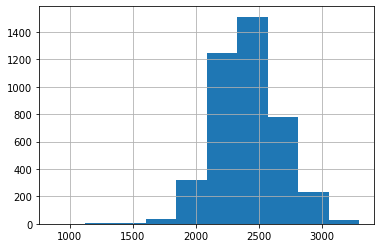

In [44]:
df['breaking_avg_spin'].hist()

<AxesSubplot:>

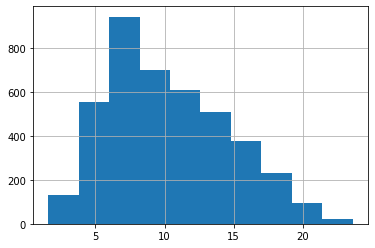

In [47]:
df['breaking_avg_break'].hist()

<AxesSubplot:>

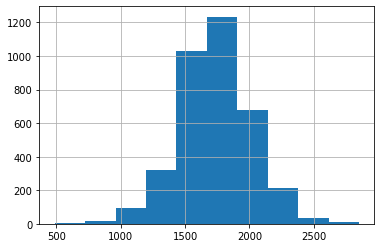

In [48]:
df['offspeed_avg_spin'].hist()

<AxesSubplot:>

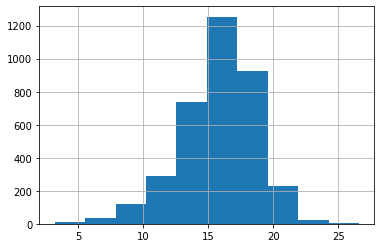

In [49]:
df['offspeed_avg_break'].hist()

In [46]:
df[(df['breaking_avg_spin']>800)&(df['breaking_avg_spin']<1600)]

,last_name,first_name,player_id,year,p_k_percent,p_bb_percent,xwoba,z_swing_percent,z_swing_miss_percent,oz_swing_percent,...,fastball_avg_speed,fastball_avg_spin,fastball_avg_break,breaking_avg_speed,breaking_avg_spin,breaking_avg_break,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break,Unnamed: 26
1058,Miranda,Ariel,664641,2016,19.0,7.8,0.336,67.5,15.7,22.4,...,93.1,2393,19.9,81.2,1187.0,9.1,83.8,1966.0,18.7,NaN
475,Dickey,R.A.,285079,2016,17.3,8.7,0.350,66.9,20.2,26.7,...,82.9,1889,17.4,76.6,1592.0,9.8,NaN,NaN,NaN,NaN
879,Light,Pat,572990,2016,17.6,17.6,0.352,57.1,17.0,24.4,...,95.7,1593,12.6,92.7,1414.0,7.8,86.2,946.0,7.4,NaN
776,Drake,Oliver,543118,2016,28.4,9.5,0.259,62.3,24.5,33.8,...,90.8,2192,20.7,82.1,929.0,8.4,82.8,953.0,10.3,NaN
673,Locke,Jeff,502046,2016,12.9,7.8,0.346,72.4,15.8,25.7,...,92.1,2078,19.0,79.3,1358.0,11.2,83.1,1506.0,12.6,NaN
1548,Garrett,Amir,607237,2017,19.6,12.5,0.366,69.4,13.3,22.0,...,91.6,1953,18.4,79.5,1578.0,7.1,80.8,1574.0,18.5,NaN
1653,Miranda,Ariel,664641,2017,20.2,9.3,0.334,71.0,20.3,23.4,...,92.1,2411,23.7,80.6,1319.0,13.2,83.8,2101.0,22.1,NaN
1065,Dickey,R.A.,285079,2017,16.7,8.2,0.318,65.8,18.4,26.7,...,83.6,1878,19.9,77.3,1530.0,9.5,NaN,NaN,NaN,NaN
1131,Wright,Steven,453214,2017,11.4,4.4,0.402,67.6,11.4,24.4,...,83.9,1890,19.2,72.6,1516.0,8.1,NaN,NaN,NaN,NaN
4197,Hirano,Yoshihisa,673633,2018,22.5,8.8,0.313,70.0,19.5,30.0,...,91.4,2214,19.5,82.5,881.0,6.3,83.3,1172.0,8.5,NaN
